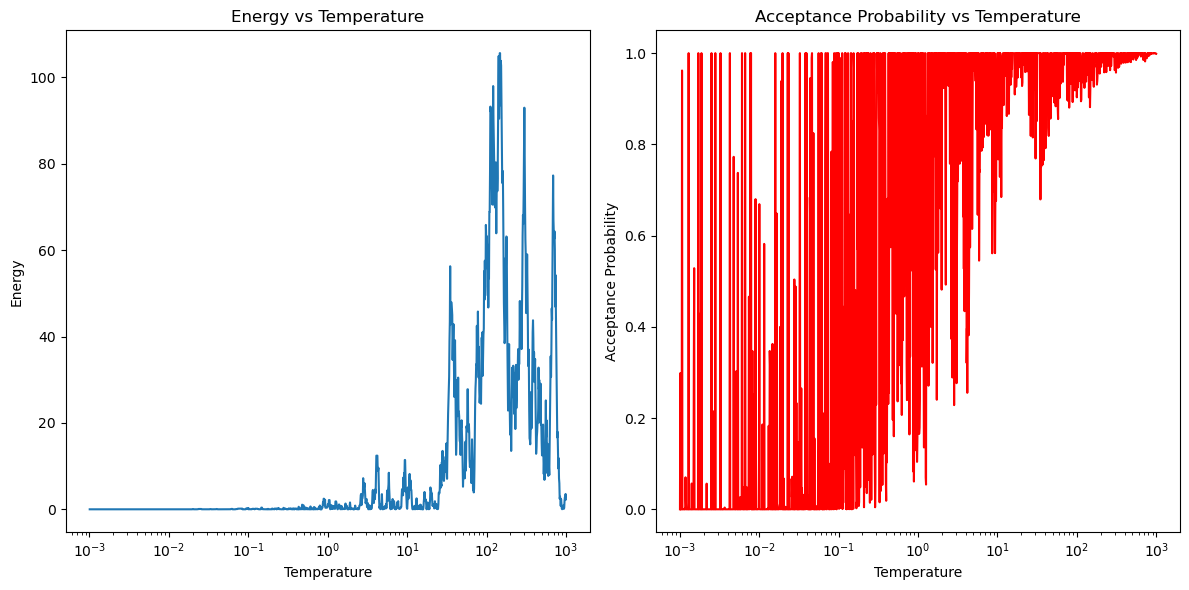

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function (minimization problem)
def objective_function(x):
    return x**2  # A simple quadratic function

# Simulated Annealing Algorithm
def simulated_annealing():
    # Initial conditions
    current_temp = 1000  # Starting temperature
    min_temp = 1e-3      # Minimum temperature
    alpha = 0.99         # Cooling rate
    current_state = np.random.uniform(-10, 10)  # Random initial solution
    current_energy = objective_function(current_state)

    # Lists to store data for plotting
    temperatures = []
    energies = []
    probabilities = []

    while current_temp > min_temp:
        # Generate a new candidate by perturbing the current state
        new_state = current_state + np.random.uniform(-1, 1)
        new_energy = objective_function(new_state)

        # Calculate the change in energy (ΔE)
        delta_energy = new_energy - current_energy

        # Probability of accepting the new state
        if delta_energy < 0:
            acceptance_probability = 1  # Always accept a better solution
        else:
            acceptance_probability = np.exp(-delta_energy / current_temp)

        # Decide whether to accept the new state
        if np.random.rand() < acceptance_probability:
            current_state = new_state
            current_energy = new_energy

        # Record the temperature, energy, and acceptance probability
        temperatures.append(current_temp)
        energies.append(current_energy)
        probabilities.append(acceptance_probability)

        # Update the temperature
        current_temp *= alpha

    return temperatures, energies, probabilities

# Run the simulation
temperatures, energies, probabilities = simulated_annealing()

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot temperature vs energy
plt.subplot(1, 2, 1)
plt.plot(temperatures, energies, label="Energy (Objective Value)")
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Energy vs Temperature')
plt.xscale('log')
plt.yscale('linear')

# Plot temperature vs probability of choosing inferior node
plt.subplot(1, 2, 2)
plt.plot(temperatures, probabilities, label="Acceptance Probability", color='r')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Probability')
plt.title('Acceptance Probability vs Temperature')
plt.xscale('log')
plt.yscale('linear')

plt.tight_layout()
plt.show()